In [39]:
import convokit 
import CorpusLoadAndFilter as CLF
import sys
try:
    del sys.modules['CorpusLoadAndFilter']
except KeyError:
    pass
import CorpusLoadAndFilter as CLF




Corpus ready to be analyszed, file loaded correctly


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/maxwellchamplin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [40]:

desiredLength = 300
teen_corpus = CLF.load_and_filter_corpus("teenagers",desiredLength)
PhD_corpus = CLF.load_and_filter_corpus("PhD",desiredLength)

CLF.features_to_csv(teen_corpus,'Analysis1corpus.csv')
CLF.features_to_csv(PhD_corpus,'Analysis2corpus.csv')

teen_corpus = CLF.tokenize(teen_corpus)
PhD_corpus = CLF.tokenize(PhD_corpus)

Corpus loaded and tokenized.
Corpus loaded and tokenized.


In [41]:
CLF.transform_corpus(teen_corpus,'Analysis1corpus.csv')
CLF.transform_corpus(PhD_corpus,'Analysis2corpus.csv')

teen_corpus.get_utterances_dataframe().head()

/Users/maxwellchamplin/Documents/GitHub/NLP_and_Identity_project1/CorpusLoadAndFilter.py:95: RuntimeWarning: invalid value encountered in scalar divide
  value = value / utt.meta['num_tokens']
/Users/maxwellchamplin/Documents/GitHub/NLP_and_Identity_project1/CorpusLoadAndFilter.py:95: RuntimeWarning: invalid value encountered in scalar divide
  value = value / utt.meta['num_tokens']


,timestamp,text,speaker,reply_to,conversation_id,meta.score,meta.top_level_comment,meta.retrieved_on,meta.gilded,meta.gildings,...,meta.n_usconj,meta.n_usym,meta.n_uverb,meta.n_uspace,meta.a_word_ps,meta.a_bry_ps,meta.corr_ttr,meta.fkgl,meta.fkre,vectors
id,,,,,,,,,,,,,,,,,,,,,
1dimfi,1367452732,I speak a lot of the majorly taught languages ...,antoniocarriedo,None,1dimfi,3,None,1412684177,0,None,...,1.0,0.0,0.909091,1.0,27.333,88.02,4.295,8.165,85.206,[]
1dim6m,1367452575,I think we need to start a study thread. I don...,[deleted],None,1dim6m,0,None,1412684188,0,None,...,0.0,0.0,1.0,0.0,10.5,44.104,3.086,-0.257,115.606,[]
1dim1z,1367452461,,smoketeaeveryday,None,1dim1z,142,None,1412684191,0,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-15.59,206.835,[]
1dilm4,1367452100,,[deleted],None,1dilm4,0,None,1412684206,0,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-15.59,206.835,[]
1dik0f,1367450837,"Now this is probably a very uncommon question,...",Friquette,None,1dik0f,0,None,1412684262,0,None,...,1.0,0.0,0.684211,0.0,18.0,69.99,3.727,4.803,92.685,[]


In [42]:
CLF.analyze_differences(corpus1=teen_corpus,corpus2=PhD_corpus)

___________ 
 item is meta.num_tokens 
 Corpus 1 median value is: 34.0 
 Corpus 2 median is: 38.0 
 ratio between them is: 0.8947368421052632
___________ 
 item is meta.n_adj 
 Corpus 1 median value is: nan 
 Corpus 2 median is: 0.09644670050761421 
 ratio between them is: nan
___________ 
 item is meta.n_adp 
 Corpus 1 median value is: nan 
 Corpus 2 median is: 0.15384615384615385 
 ratio between them is: nan
___________ 
 item is meta.n_adv 
 Corpus 1 median value is: nan 
 Corpus 2 median is: 0.14482758620689656 
 ratio between them is: nan
___________ 
 item is meta.n_aux 
 Corpus 1 median value is: nan 
 Corpus 2 median is: 0.1282051282051282 
 ratio between them is: nan
___________ 
 item is meta.n_cconj 
 Corpus 1 median value is: nan 
 Corpus 2 median is: 0.06532663316582915 
 ratio between them is: nan
___________ 
 item is meta.n_det 
 Corpus 1 median value is: nan 
 Corpus 2 median is: nan 
 ratio between them is: nan
___________ 
 item is meta.n_intj 
 Corpus 1 median value

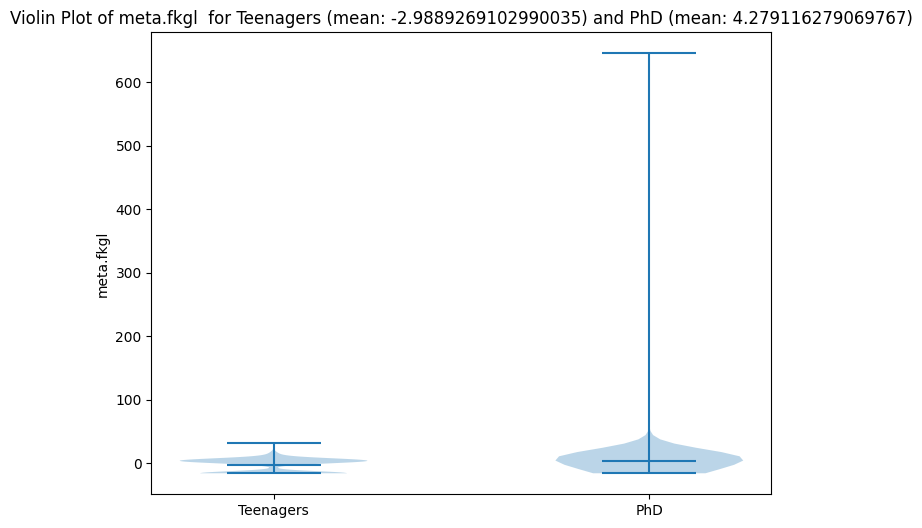

In [44]:
CLF.visualize_differences(corpus1=teen_corpus,corpus2=PhD_corpus,feature='meta.fkgl',corpus1_name='Teenagers',corpus2_name='PhD')

# Work on presenting the key differences between the two corpora 

so we arent printing a bunch of charts that are not important. Goal is to identify the 5 most different features and then print a boxplot, and median/ standard deviation for them.  

In [ ]:
largest_differences = CLF.analyze_differences(teen_corpus, PhD_corpus)
print('the largest differences are in the following fields: ',largest_differences)

the largest differences are in the following fields:  ({'empty': 'to be implemented'}, {'empty': 'to be implemented'})
